<a href="https://colab.research.google.com/github/jess-izuu/COVID-19/blob/master/HurricaneMichael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!apt-get install -y libspatialindex-dev
!pip install rtree
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

     |████████████████████████████████| 972kB 2.6MB/s 
     |████████████████████████████████| 10.9MB 17.3MB/s 
     |████████████████████████████████| 14.7MB 310kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ub

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Colab Notebooks/'

location = root_path+"hurricaneMichael.csv"

#load data into dataframe
#seperator between values in file is a comma
hurricane_df = pd.read_csv(location, sep=",")
hurricane_df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Colab Notebooks/'

filepath = root_path+"US_states(5m).json"

states_df = gpd.read_file(filepath)
states_df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935..."
7,0400000US10,10,Delaware,,1948.543,"MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ..."
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03860 38.79151, -77.03890 38.800..."
9,0400000US12,12,Florida,,53624.759,"MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ..."


In [4]:
map48 = states_df.loc[states_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

In [19]:
hurricane_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [7]:
map48.head

<bound method NDFrame.head of          GEO_ID  ...                                           geometry
0   0400000US01  ...  MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...
2   0400000US04  ...  POLYGON ((-112.53859 37.00067, -112.53454 37.0...
3   0400000US05  ...  POLYGON ((-94.04296 33.01922, -94.04304 33.079...
4   0400000US06  ...  MULTIPOLYGON (((-122.42144 37.86997, -122.4213...
5   0400000US08  ...  POLYGON ((-106.19055 40.99761, -106.06118 40.9...
6   0400000US09  ...  POLYGON ((-71.79924 42.00807, -71.79792 41.935...
7   0400000US10  ...  MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ...
8   0400000US11  ...  POLYGON ((-77.03860 38.79151, -77.03890 38.800...
9   0400000US12  ...  MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ...
10  0400000US13  ...  POLYGON ((-84.81048 34.98761, -84.80918 34.987...
12  0400000US16  ...  POLYGON ((-111.04416 43.02005, -111.04413 43.0...
13  0400000US17  ...  POLYGON ((-89.36603 42.50027, -89.36156 42.500...
14  0400000US18  ...  POLYGON ((-8

In [17]:
hurricane_df['Long'] = 0 - hurricane_df['Long']

In [18]:
hurricane_df['Long']

0    -86.6
1    -86.6
2    -86.6
3    -87.1
4    -86.9
5    -86.8
6    -86.9
7    -86.9
8    -85.5
9    -85.4
10   -85.4
11   -85.5
12   -85.5
13   -85.1
14   -84.9
15   -85.1
16   -85.2
17   -85.2
18   -85.3
19   -85.7
20   -85.9
21   -86.1
22   -86.2
23   -86.4
24   -86.4
25   -86.5
26   -86.5
27   -86.6
28   -86.5
29   -86.3
30   -86.0
31   -85.5
32   -85.1
33   -84.5
34   -83.8
35   -83.2
36   -82.5
37   -81.8
38   -80.8
39   -80.0
40   -78.8
41   -77.8
42   -76.1
43   -75.1
44   -73.1
Name: Long, dtype: float64

In [20]:
#make a new column to hold the longitude & latitude as a list
hurricane_df['coordinates'] = list(hurricane_df[['Long', 'Lat']].values)

In [21]:
hurricane_df

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[-86.9, 18.6]"
5,3A,10/07/2018 08:00,18.9,-86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/07/2018 07:53,Brown,"[-86.8, 18.9]"
6,4,10/07/2018 11:00,19.2,-86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/07/2018 10:53,Brown,"[-86.9, 19.2]"
7,4A,10/07/2018 14:00,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,10/07/2018 13:44,Brown,"[-86.9, 19.2]"
8,5,10/07/2018 17:00,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/07/2018 17:02,Brown,"[-85.5, 19.2]"
9,5A,10/07/2018 20:00,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/07/2018 19:41,Stewart,"[-85.4, 19.9]"


In [23]:
#convert the coordinates to a geolocation type
hurricane_df['coordinates'] = hurricane_df['coordinates'].apply(Point)

In [24]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
michael = gpd.GeoDataFrame(hurricane_df, geometry='coordinates')

In [25]:
michael.head

<bound method NDFrame.head of    AdvisoryNumber              Date  ...  Forecaster                 coordinates
0               1  10/06/2018 17:00  ...       Beven  POINT (-86.60000 18.00000)
1              1A  10/06/2018 20:00  ...       Avila  POINT (-86.60000 18.30000)
2               2  10/06/2018 23:00  ...       Avila  POINT (-86.60000 18.80000)
3              2A  10/07/2018 02:00  ...        Berg  POINT (-87.10000 18.40000)
4               3  10/07/2018 05:00  ...        Berg  POINT (-86.90000 18.60000)
5              3A  10/07/2018 08:00  ...       Brown  POINT (-86.80000 18.90000)
6               4  10/07/2018 11:00  ...       Brown  POINT (-86.90000 19.20000)
7              4A  10/07/2018 14:00  ...       Brown  POINT (-86.90000 19.20000)
8               5  10/07/2018 17:00  ...       Brown  POINT (-85.50000 19.20000)
9              5A  10/07/2018 20:00  ...     Stewart  POINT (-85.40000 19.90000)
10              6  10/07/2018 23:00  ...     Stewart  POINT (-85.40000 20.00000

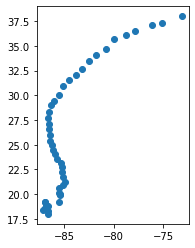

In [26]:
michael.plot()

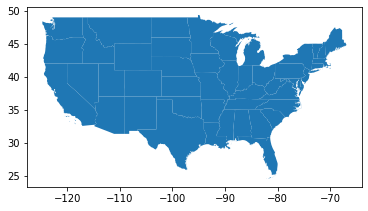

In [29]:
map48.plot()

Text(0.5, 1.0, 'Hurricane Michael')

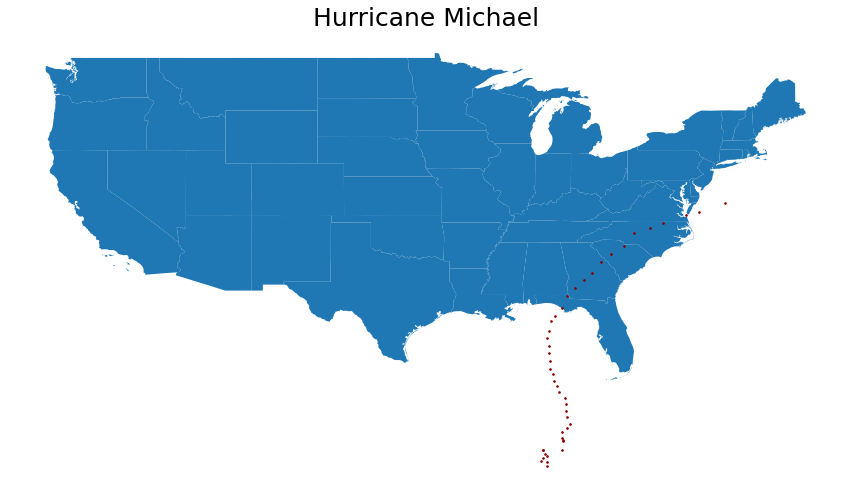

In [31]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
michael.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael", fontsize=25, fontweight=3)